# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
path = ''
training_file = path + 'train.p'
validation_file = path + 'valid.p'
testing_file = path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)

    # TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

    # TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of valid examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

The first step is to analyize the distribution of our training dataset and identify potential issues with some classes being under-represented

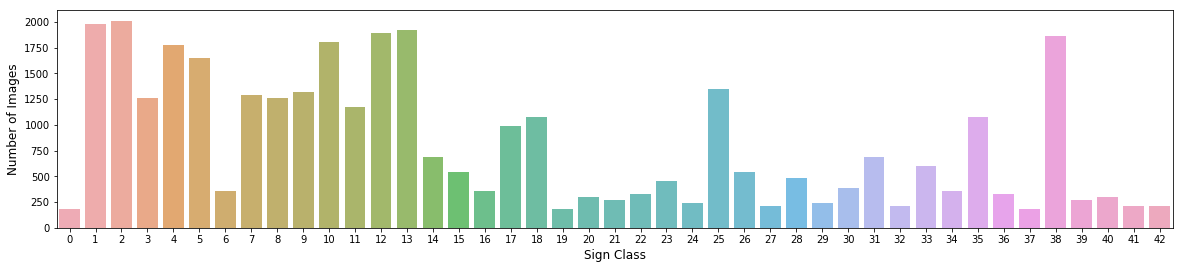

In [6]:
# We will load the sign names from the provided csv file and add a counter to each sign class
import seaborn as sns
import pandas as pd
import collections
import random

sign_names = pd.read_csv('signnames.csv')
# Add counter
a = collections.Counter(y_train)
b = pd.DataFrame.from_dict(a, orient='index')
df2 = pd.DataFrame.from_dict(collections.Counter(y_train), orient='index').reset_index()
df2 = df2.rename(columns={'index': 'ClassId', 0: 'Count'})
sign_names['NumImages'] = df2['Count']

plt.figure(figsize=(20, 4))
sns.barplot(sign_names['ClassId'].values, sign_names['NumImages'].values, alpha=0.8, )
plt.xlabel('Sign Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

Then analyize the distribution of our training/valid/test dataset 

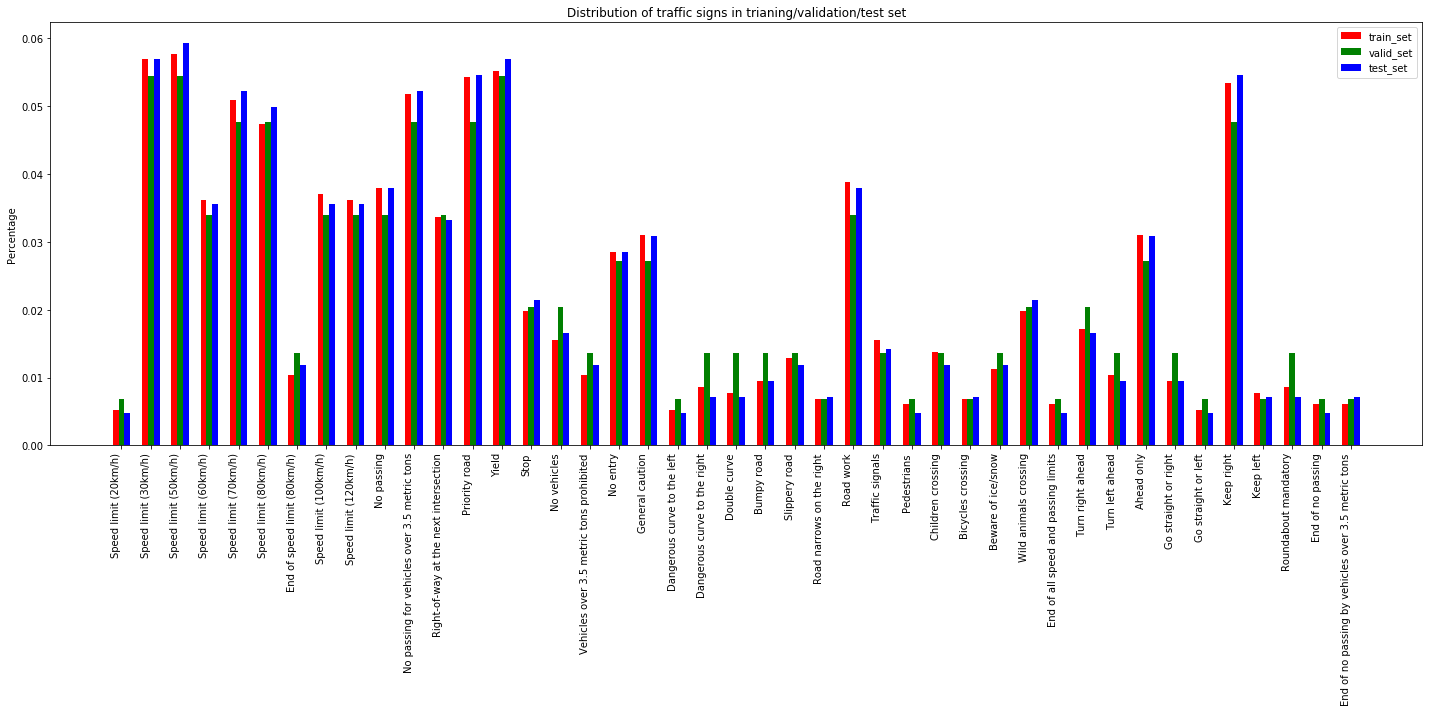

In [8]:
train_counter = collections.Counter(y_train)
train_counter = [train_counter[i] for i in range(n_classes)]
train_percentage = train_counter / np.sum(train_counter)
valid_counter = collections.Counter(y_valid)
valid_counter = [valid_counter[i] for i in range(n_classes)]
valid_percentage = valid_counter / np.sum(valid_counter)
test_counter = collections.Counter(y_test)
test_counter = [test_counter[i] for i in range(n_classes)]
test_percentage = test_counter / np.sum(test_counter)

bar_width = 0.2
index = np.arange(n_classes)
fig, ax = plt.subplots(figsize=(20, 10))

train_rects = ax.bar(index, train_percentage, bar_width, color='r', label='train_set')
valid_rects = ax.bar(index + bar_width, valid_percentage, bar_width, color='g', label='valid_set')
test_rects = ax.bar(index + 2 * bar_width, test_percentage, bar_width, color='b', label='test_set')
ax.set_title('Distribution of traffic signs in trianing/validation/test set')
ax.set_ylabel('Percentage')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(sign_names.SignName)
    # reverse x label
for label in ax.get_xticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('right')

ax.legend()
fig.tight_layout()
plt.show()

We can see that the training dataset is very biased toward some classes. Let's take a deeper look into the classes that are better represented and the classes that have very few training examples.

First let's begin with the classes that have very few samples.

Speed limit (20km/h) :


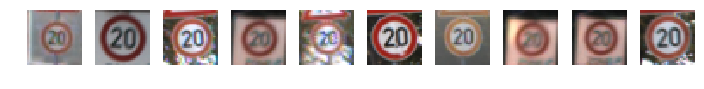

Go straight or left :


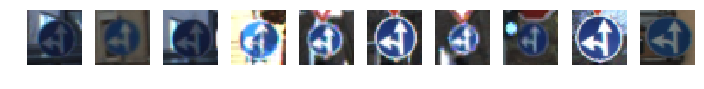

Dangerous curve to the left :


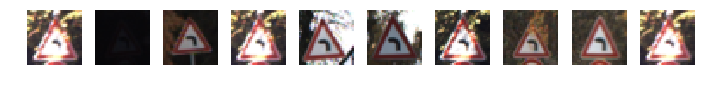

End of all speed and passing limits :


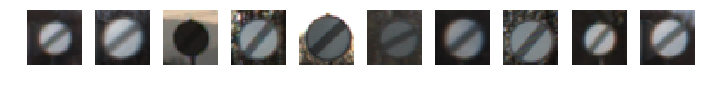

Pedestrians :


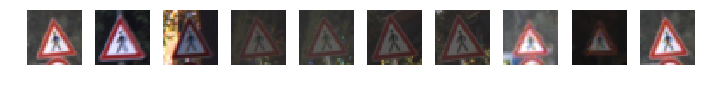

End of no passing :


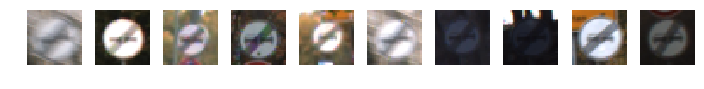

End of no passing by vehicles over 3.5 metric tons :


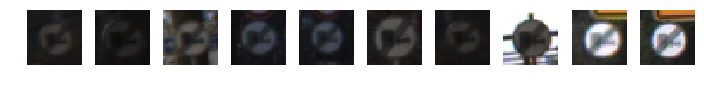

Road narrows on the right :


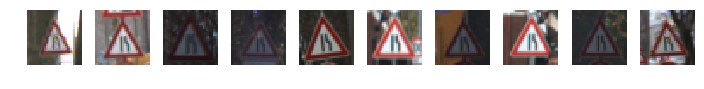

Bicycles crossing :


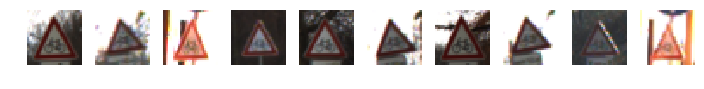

Keep left :


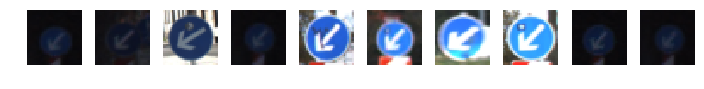

In [9]:
bottom10 = sign_names.sort_values(by=['NumImages'])[0: 10]['ClassId'].values

for classid in bottom10:
    print(sign_names.SignName[classid], ':')
    implot = plt.figure(figsize=(12, 1))
    X_class = X_train[y_train == classid]
    rnd_idx = random.sample(range(len(X_class)), 10)
    for i in range(10):
        ax = implot.add_subplot(1, 10, i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]])
    plt.show()


Speed limit (50km/h) :


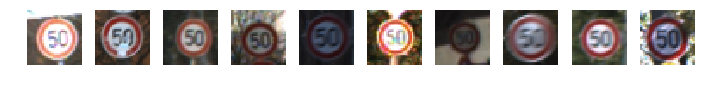

Speed limit (30km/h) :


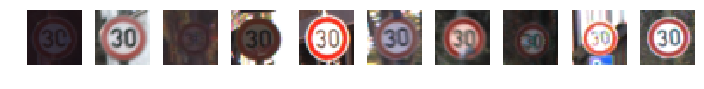

Yield :


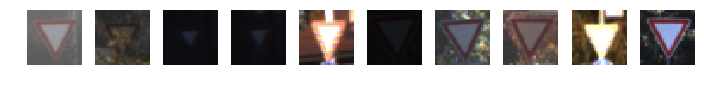

Priority road :


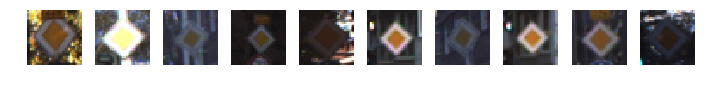

Keep right :


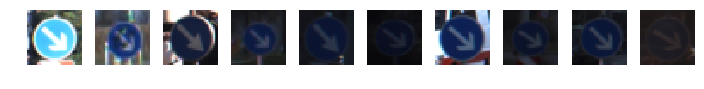

No passing for vehicles over 3.5 metric tons :


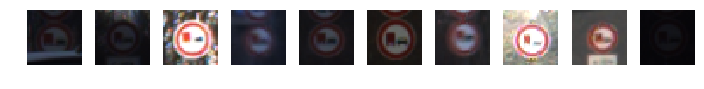

Speed limit (70km/h) :


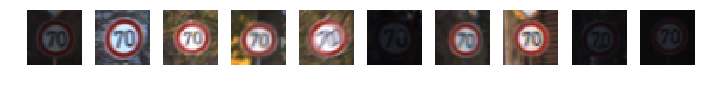

Speed limit (80km/h) :


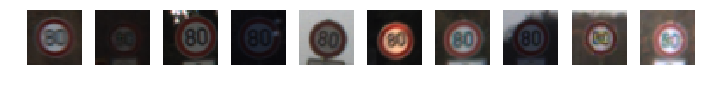

Road work :


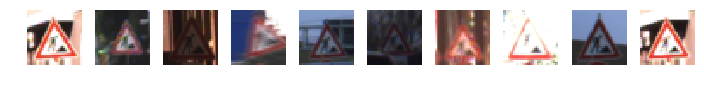

No passing :


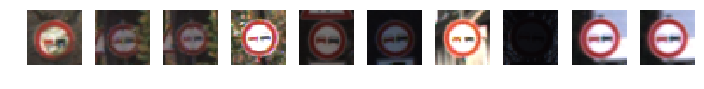

In [10]:
top10 = sign_names.sort_values(by=['NumImages'], ascending=False)[0: 10]['ClassId'].values

for classid in top10:
    print(sign_names.SignName[classid], ':')
    implot = plt.figure(figsize=(12, 1))
    X_class = X_train[y_train == classid]
    rnd_idx = random.sample(range(len(X_class)), 10)
    for i in range(10):
        ax = implot.add_subplot(1, 10, i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]])
    plt.show()

We can see that the quality of the images are very different one from another. This discrepancy will certainly impact our model if we are not careful with the pre-processing of these images.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

from skimage import exposure
from keras.utils import np_utils
from sklearn.utils import shuffle
from preprocess import *
from helper import *

Using TensorFlow backend.
/home/wade/.conda/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
X_trn_pp, y_trn_pp = preprocess_data(X_train, y_train, dataset="train", augment=1, preprocess=True)
X_val_pp, y_val_pp = preprocess_data(X_valid, y_valid, dataset="valid", augment=1, preprocess=True)
X_tst_pp, y_tst_pp = preprocess_data(X_test, y_test, dataset="test", augment=1, preprocess=True)

On [1] the winners of the GTSRB challenge addressed this problem by normalizing the contrast during preprocessing.
By using this preprocess method, the poor lighting conditions problem seems to be solved. The edges, profile information seems to be more clear to be recognized.

Let's have a look at the preprocessed image results.  

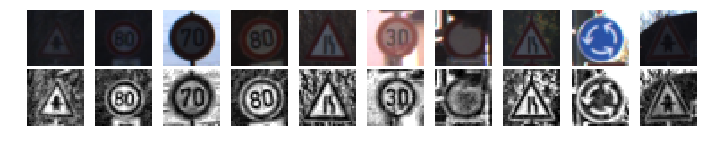

In [15]:
implot = plt.figure(figsize=(12, 4))
rnd_idx = random.sample(range(len(X_train)), 10)
for i in range(10):
    ax1 = implot.add_subplot(2, 10, i + 1)
    ax1.grid(False)
    ax1.axis('off')
    ax1.imshow(X_train[rnd_idx[i]])
    
    ax2 = implot.add_subplot(1, 10, i + 1)
    ax2.grid(False)
    ax2.axis('off')
    ax2.imshow(img_preprocess(X_train[rnd_idx[i]])[:, :, 0], cmap='gray')
plt.show()

Normalize the dataset, it scales the mean of dataset to 0 and the variance of data to 1

Normalizing either input or target variables tends to make the training process better behaved by improving the numerical condition (see ftp://ftp.sas.com/pub/neural/illcond/illcond.html) of the optimization problem and ensuring that various default values involved in initialization and termination are appropriate. Standardizing targets can also affect the objective function.

In [16]:
#### Normalize the data set ####
mean = np.mean(X_trn_pp)
stdd = np.std(X_trn_pp)
scaled_X_trn_pp = (X_trn_pp - mean) / stdd
scaled_X_val_pp = (X_val_pp - mean) / stdd
scaled_X_tst_pp = (X_tst_pp - mean) / stdd

### Model Architecture

In [17]:
from sklearn.utils import shuffle
from cnn_model import *

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

First, I tried the LeNet-5 model.

This is how we implemented our LeNet-5 model:

- Input(32, 32, 3 or 32, 32, 1 - depending on whether you are passing on color or gray scale images)

- Convolution (Kernel: 5x5, Depth: 6, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)


- Convolution (Kernel: 5x5, Depth: 16, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)

- Flatten
- Fully Connected layer (Size: 120, activation: Relu)
- Fully Connected layer (Size: 84, activation: Relu)
- Softmax (n_classes = 43)


In [20]:
def get_LeNet(features, n_classes):

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    with tf.variable_scope('conv1'):
        conv1 = conv2d(features, kernel_sz=5, depth=6)
        conv1 = tf.nn.relu(conv1)
        pool1 = maxpool2d(conv1)

    # Layer 2: Convolutional. Output = 10x10x16.
    with tf.variable_scope('conv2'):
        conv2 = conv2d(pool1, kernel_sz=5, depth=16)
        conv2 = tf.nn.relu(conv2)
        pool2 = maxpool2d(conv2)

    # Flatten. Input = 5x5x16. Output = 400.
    fc_input = flatten(pool2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    with tf.variable_scope('fc3'):
        fc3 = fc(fc_input, 120)
        fc3 = tf.nn.relu(fc3)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    with tf.variable_scope('fc4'):
        fc4 = fc(fc3, 84)
        fc4 = tf.nn.relu(fc4)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    with tf.variable_scope('out'):
        logits = fc(fc4, n_classes)

    return logits

In the function below, I

- Build the graph of LeNet by using tensorflow

- Define the mutiple tensorflow operation, including training, getting accuracy and so on.

- Use EarlyStopping class to help us monitor the loss of validation dataset

- Store the model which has smallest valid loss

- Plot the training/valid plot

- Evaluate the model by using test dataset

In [22]:
def lenet_modeling(X_train, y_train, X_valid, y_valid, X_test, y_test, params):

    lr, max_epoches, batch_size, l2_lambda, model_name, resume_training, early_stopping_patience, epochs_print = params
    n_classes = len(np.unique(y_train))

    start = time.time()
    # ## construct tensorflow graph ##
    # ----------------
    lenet_graph = tf.Graph()
    with lenet_graph.as_default():
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)

        #is_dropout = tf.placeholder(tf.bool)
        logits = get_LeNet(x, n_classes=n_classes)
        logits_probs = tf.nn.softmax(logits)

        optimizer = tf.train.AdamOptimizer(learning_rate=lr)

        with tf.variable_scope('fc3', reuse=True):
            reg_fc3 = tf.nn.l2_loss(tf.get_variable('weights'))

        with tf.variable_scope('fc4', reuse=True):
            reg_fc4 = tf.nn.l2_loss(tf.get_variable('weights'))

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
        # L2 regularize
        loss_operation = tf.reduce_mean(cross_entropy + l2_lambda * (reg_fc3 + reg_fc4))
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        training_operation = optimizer.minimize((loss_operation))

    # ##  train models ## #
    # ---------------------
    with tf.Session(graph=lenet_graph) as sess:
        sess.run(tf.global_variables_initializer())

        def acc_and_loss(X_data, y_data, batch_size=64):
            num_examples = len(X_data)
            total_accuracy = 0
            softmax_cross_entropy = []
            sess = tf.get_default_session()
            for offset in range(0, num_examples, batch_size):
                batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
                [accuracy, softmax] = sess.run([accuracy_operation, cross_entropy],
                                               feed_dict={x: batch_x, y: batch_y})
                total_accuracy += (accuracy * len(batch_x))
                softmax_cross_entropy.extend(softmax)
            return total_accuracy / num_examples, np.mean(softmax_cross_entropy)

        saver = tf.train.Saver()
        # If we chose to keep training previously trained model, restore session.
        if resume_training:
            try:
                tf.train.Saver().restore(sess,'models/' + model_name)
            except Exception as e:
                print(e)
                print("Failed restoring previously trained model: file does not exist.")
                pass
        else:
            print("Training new model...")

        early_stopping = EarlyStopping(saver, sess, model_name, patience=early_stopping_patience, minimize=True)

        train_loss_history = np.empty([0], dtype=np.float32)
        train_accuracy_history = np.empty([0], dtype=np.float32)
        valid_loss_history = np.empty([0], dtype=np.float32)
        valid_accuracy_history = np.empty([0], dtype=np.float32)

        train_num = len(y_train)
        for i in range(max_epoches):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, train_num, batch_size):
                batch_x = X_train[offset: offset + batch_size]
                batch_y = y_train[offset: offset + batch_size]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            training_acc, training_loss = acc_and_loss(X_train, y_train)
            valid_acc, valid_loss = acc_and_loss(X_valid, y_valid)

            train_accuracy_history = np.append(train_accuracy_history, training_acc)
            train_loss_history = np.append(train_loss_history, training_loss)
            valid_accuracy_history = np.append(valid_accuracy_history, valid_acc)
            valid_loss_history = np.append(valid_loss_history, valid_loss)

            if epochs_print > 0:
                if (i % epochs_print == 0):
                    print("EPOCH: {}, lr: {:.5f} ...".format(i, lr))
                    print("Training Loss = {:.5f}, Training Accuracy = {:.3f}".format(training_loss, training_acc))
                    print("Validation Loss = {:.5f}, Validation Accuracy = {:.3f}".format(valid_loss, valid_acc))
                    print()

            if early_stopping_patience > 0:
                if early_stopping(valid_loss, i):
                    print("Early stopping.\nBest monitored loss was {:.6f} at epoch {}.".format(
                        early_stopping.best_monitored_value, early_stopping.best_monitored_epoch))
                    break


        ### evaluate model ###
        test_acc, test_loss = acc_and_loss(X_test, y_test)
        valid_acc, valid_loss = acc_and_loss(X_valid, y_valid)
        print("=============================================")
        print(" Valid loss: %.8f, accuracy = %.4f)" % (valid_loss, valid_acc))
        print(" Test loss: %.8f, accuracy = %.4f)" % (test_loss, test_acc))
        print(" Total time: " + get_time_hhmmss(start))
        print("  Timestamp: " + get_time_hhmmss())

        # store the training/validation history
        np.savez('models/' + model_name + '_history',
                 train_loss_history=train_loss_history,
                 train_accuracy_history=train_accuracy_history,
                 valid_loss_history=valid_loss_history,
                 valid_accuracy_history=valid_accuracy_history)

        print("Model saved")
        plot_history(model_name)

In [23]:
"""
Forked from:
https://github.com/navoshta/traffic-signs/blob/master/Traffic_Signs_Recognition.ipynb
"""
import time
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import itertools

class EarlyStopping(object):
    """
    Provides early stopping functionality. Keeps track of model accuracy,
    and if it doesn't improve over time restores last best performing
    parameters.
    """

    def __init__(self, saver, session, model_name, patience=100, minimize=True):
        """
        Initialises a `EarlyStopping` isntance.

        Parameters
        ----------
        saver     :
                    TensorFlow Saver object to be used for saving and restoring model.
        session   :
                    TensorFlow Session object containing graph where model is restored.
        patience  :
                    Early stopping patience. This is the number of epochs we wait for
                    accuracy to start improving again before stopping and restoring
                    previous best performing parameters.

        Returns
        -------
        New instance.
        """
        self.minimize = minimize
        self.patience = patience
        self.saver = saver
        self.session = session
        self.best_monitored_value = np.inf if minimize else 0.
        self.best_monitored_epoch = 0
        self.restore_path = None
        self.model_name = model_name

    def __call__(self, value, epoch):
        """
        Checks if we need to stop and restores the last well performing values if we do.

        Parameters
        ----------
        value     :
                    Last epoch monitored value.
        epoch     :
                    Last epoch number.

        Returns
        -------
        `True` if we waited enough and it's time to stop and we restored the
        best performing weights, or `False` otherwise.
        """
        if (self.minimize and value < self.best_monitored_value) or (
                not self.minimize and value > self.best_monitored_value):
            self.best_monitored_value = value
            self.best_monitored_epoch = epoch
            self.restore_path = self.saver.save(self.session,  "models/" + self.model_name)
        elif self.best_monitored_epoch + self.patience < epoch:
            if self.restore_path != None:
                self.saver.restore(self.session, self.restore_path)
            else:
                print("ERROR: Failed to restore session")
            return True

        return False


In [24]:
def plot_history(model_name):
    history = np.load('models/' + model_name + '_history.npz')

    implot = plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss_history'], '-o')
    plt.plot(history['valid_loss_history'], '-o')
    plt.legend(['trn_loss', 'val_loss'], loc='upper right')
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy_history'], '-o')
    plt.plot(history['valid_accuracy_history'], '-o')
    plt.legend(['trn_accuracy', 'val_accuracy'], loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

    plt.show()

Setup training parameters and begin to train the leNet model

Setup training parameters and begin to train the new cnn model

- Optimizer: Adam
- max_epoches: 300
- batch_size: 64
- learning rate: 1e-3
- l2-regulaize: 1e-3

Training new model...
EPOCH: 0, lr: 0.00100 ...
Training Loss = 0.15257, Training Accuracy = 0.957
Validation Loss = 0.31103, Validation Accuracy = 0.899

EPOCH: 5, lr: 0.00100 ...
Training Loss = 0.02440, Training Accuracy = 0.994
Validation Loss = 0.15746, Validation Accuracy = 0.954

EPOCH: 10, lr: 0.00100 ...
Training Loss = 0.02004, Training Accuracy = 0.994
Validation Loss = 0.17823, Validation Accuracy = 0.953

EPOCH: 15, lr: 0.00100 ...
Training Loss = 0.01346, Training Accuracy = 0.996
Validation Loss = 0.11807, Validation Accuracy = 0.968

EPOCH: 20, lr: 0.00100 ...
Training Loss = 0.01757, Training Accuracy = 0.994
Validation Loss = 0.12501, Validation Accuracy = 0.969

EPOCH: 25, lr: 0.00100 ...
Training Loss = 0.01134, Training Accuracy = 0.997
Validation Loss = 0.13624, Validation Accuracy = 0.964

EPOCH: 30, lr: 0.00100 ...
Training Loss = 0.03924, Training Accuracy = 0.988
Validation Loss = 0.23263, Validation Accuracy = 0.942

EPOCH: 35, lr: 0.00100 ...
Training Loss =

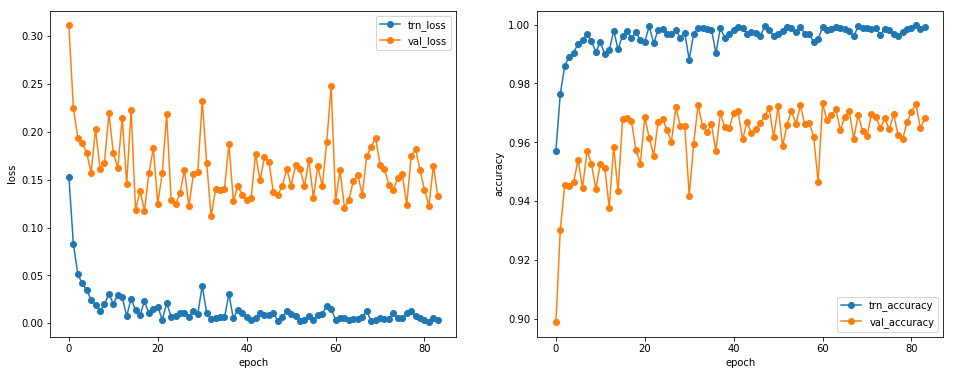

In [25]:
  #### Control panel 1, setup model parameters ####
model_name = 'lenet_'

max_epoches = 300
batch_size = 64
epochs_print = 5

lr = 1e-3
l2_lambda = 1e-3

resume_training = False
early_stopping_patience = 50

params = [lr, max_epoches, batch_size, l2_lambda, model_name,
         resume_training, early_stopping_patience, epochs_print]

#### train the model and evaluate the mode ###
lenet_modeling(scaled_X_trn_pp, y_trn_pp, scaled_X_val_pp, y_val_pp, scaled_X_tst_pp, y_tst_pp, params=params)

As we can see, by using just LeNet-5 models and constrast normalize preprocess technology, we can reach a 97.3% validation accuacy and 94.6% test accuacy.

Then, we can choose a smaller learning rate and fine tuning the model to see whether if we can get a higher accuacy or not.

INFO:tensorflow:Restoring parameters from models/lenet_
EPOCH: 0, lr: 0.00001 ...
Training Loss = 0.00282, Training Accuracy = 0.999
Validation Loss = 0.10405, Validation Accuracy = 0.977

EPOCH: 5, lr: 0.00001 ...
Training Loss = 0.00095, Training Accuracy = 1.000
Validation Loss = 0.10355, Validation Accuracy = 0.979

EPOCH: 10, lr: 0.00001 ...
Training Loss = 0.00051, Training Accuracy = 1.000
Validation Loss = 0.10906, Validation Accuracy = 0.978

EPOCH: 15, lr: 0.00001 ...
Training Loss = 0.00038, Training Accuracy = 1.000
Validation Loss = 0.10986, Validation Accuracy = 0.979

EPOCH: 20, lr: 0.00001 ...
Training Loss = 0.00042, Training Accuracy = 1.000
Validation Loss = 0.10796, Validation Accuracy = 0.979

EPOCH: 25, lr: 0.00001 ...
Training Loss = 0.00051, Training Accuracy = 1.000
Validation Loss = 0.10577, Validation Accuracy = 0.977

EPOCH: 30, lr: 0.00001 ...
Training Loss = 0.00059, Training Accuracy = 1.000
Validation Loss = 0.10302, Validation Accuracy = 0.976

EPOCH: 3

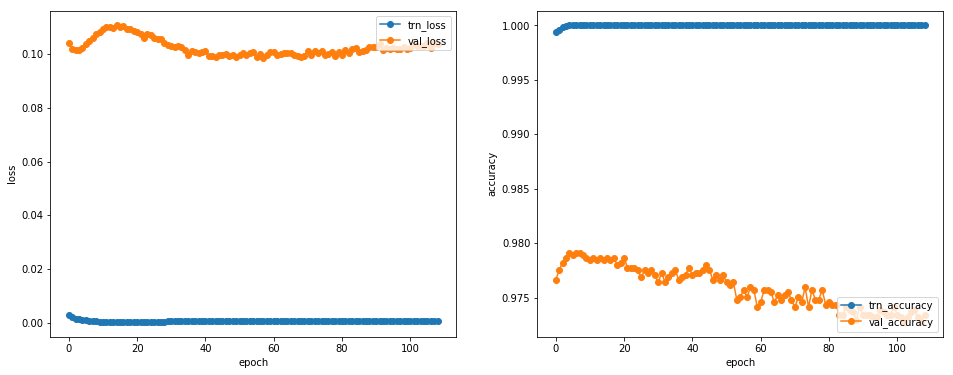

In [26]:
#### Control panel 2, setup model parameters ####                                                             
#### Modify learning rate and fine tuning the model ###                                                       
model_name = 'lenet_'                                                                                         
                                                                                                              
max_epoches = 300                                                                                             
batch_size = 64                                                                                               
epochs_print = 5                                                                                              
                                                                                                              
lr = 1e-5                                                                                                     
l2_lambda = 1e-3                                                                                              
                                                                                                              
resume_training = True                                                                                        
early_stopping_patience = 50                                                                                  
                                                                                                              
params = [lr, max_epoches, batch_size, l2_lambda, model_name,                                                 
          resume_training, early_stopping_patience, epochs_print]                                             
                                                                                                              
lenet_modeling(scaled_X_trn_pp, y_trn_pp, scaled_X_val_pp, y_val_pp, scaled_X_tst_pp, y_tst_pp, params=params)

By fine tuning the model, we can imporve the validation accuacy from 97.3% to 97.6% !!

In [27]:
def evaluate_model(X_data, y_data, model_name, batch_size=64):

    assert len(X_data) == len(y_data)
    # ## construct tensorflow graph ##
    # ----------------
    lenet_graph = tf.Graph()
    with lenet_graph.as_default():
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)

        #is_dropout = tf.placeholder(tf.bool)
        logits = get_LeNet(x, n_classes=n_classes)

        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # evaluate the model by using test data
    num_examples = len(X_data)
    total_accuracy = 0
    with tf.Session(graph=lenet_graph) as sess:
        saver = tf.train.Saver()
        try:
            saver.restore(sess, 'models/' + model_name)
        except:
            print("Failed restoring previously trained model: file does not exist.")
            pass

        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset: offset + batch_size], y_data[offset: offset + batch_size]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * batch_size)

        accuracy = total_accuracy / num_examples
        print("================= Evaluate ==================")
        print("Model evaluate accuracy = %.4f" % accuracy)

In [28]:
#### Evaluate the trained model ####
evaluate_model(scaled_X_tst_pp, y_tst_pp, model_name)

INFO:tensorflow:Restoring parameters from models/lenet_
================= Evaluate ==================
Model evaluate accuracy = 0.9569


Finally, we reach a 95.7% test accuacy. 
It's not bad, because we only adopt the LeNet-5 model. 
And we still have a lot of space to improve !

### Data Augmentation

For this part I created a function that will randomly rotate, scale and translate our images with the same parameters as implemented in [2]

Sermanet and LeCun also suggested that their model could perform better if they added some Real-world deformations, such as motion blur and shape deformations. So I decided to add them to our pipeline as well.


- Rotation between -15 and 15 degrees
- Scaling between 0.9 and 1.1
- Translation between -2 and 2 pixels

I have also added a shear transformation and motion blur as suggested by the authors at the summary of their work. The parameters for this new transformations are:

- Shear limit between -10 and 10 degrees
- Motion blur kernel size of 3 pixels


From Left to right: Original Img, Histogram Equalization, Rotate, Motion Blur and Affine


/home/wade/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/wade/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


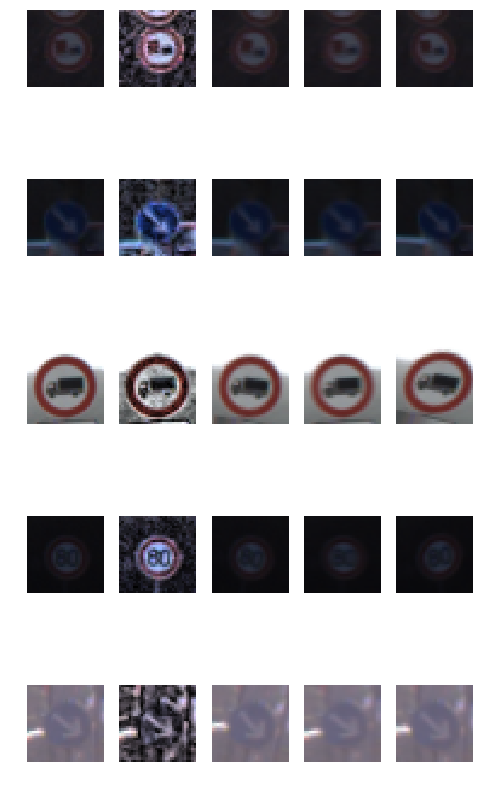

In [29]:
# show the augment image
rnd_idx = random.sample(range(len(X_train)), 5)
fig, axes = plt.subplots(5, 5, figsize=(8, 15))
print("From Left to right: Original Img, Histogram Equalization, Rotate, Motion Blur and Affine")
for i in range(5):
    axes[i, 0].grid(False)
    axes[i, 0].axis('off')
    axes[i, 0].imshow(X_train[rnd_idx[i]])

    axes[i, 1].grid(False)
    axes[i, 1].axis('off')
    axes[i, 1].imshow(Adapthisteq(X_train[rnd_idx[i]]))

    axes[i, 2].grid(False)
    axes[i, 2].axis('off')
    axes[i, 2].imshow(rotate(X_train[rnd_idx[i]]))

    axes[i, 3].grid(False)
    axes[i, 3].axis('off')
    axes[i, 3].imshow(motion_blur(X_train[rnd_idx[i]]))

    axes[i, 4].grid(False)
    axes[i, 4].axis('off')
    axes[i, 4].imshow(affine(X_train[rnd_idx[i]]))
plt.show()

In [31]:
 #### Preprocess the data  ####
    # augment the training dataset 7 times
X_trn_pp, y_trn_pp = preprocess_data(X_train, y_train, dataset="train", augment=7, preprocess=True)
X_val_pp, y_val_pp = preprocess_data(X_valid, y_valid, dataset="valid", augment=1, preprocess=True)
X_tst_pp, y_tst_pp = preprocess_data(X_test, y_test, dataset="test", augment=1, preprocess=True)

In [32]:
# TODO: Number of training examples
n_train = len(X_trn_pp)
print("After the data augmentation, the number of training examples =", n_train)

After the data augmentation, the number of training examples = 243593


In [33]:
    #### Normalize the augmented data set ####
mean = np.mean(X_trn_pp)
stdd = np.std(X_trn_pp)
scaled_X_trn_pp = (X_trn_pp - mean) / stdd
scaled_X_val_pp = (X_val_pp - mean) / stdd
scaled_X_tst_pp = (X_tst_pp - mean) / stdd

**Model architecture**

I used a fairly simple model of 3 convolutional layers and 1 fully connected layer (with every convolutional and fully connected layer being followed by a ReLU non-linearity):

![Model](model_architecture.png)

As per Pierre Sermanet paper, I have provided output of every convolutional layer to the classifier, applying additional pooling to each of the convolutinal outputs, so that they are proportionally downsampled.

This is how we implemented our new cnn model:

- Input(32, 32, 3 or 32, 32, 1 - depending on whether you are passing on color or gray scale images)

- Convolution (Kernel: 5x5, Depth: 32, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)
- Dropout (Prob: 0.2)


- Convolution (Kernel: 5x5, Depth: 64, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)
- Dropout (Prob: 0.2)


- Convolution (Kernel: 5x5, Depth: 128, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)
- Dropout (Prob: 0.2)


- Concat the three above maxpool layer and flattened it


- Fully Connected layer (Size: 1024, activation: Relu)
- Dropout (Prob: 0.5)


- Softmax (n_classes = 43)


In [35]:
def get_modern_cnn(features, n_classes, dropout):
    """
       Performs a full model pass.

       Parameters
       ----------
       input         : Tensor
                       NumPy array containing a batch of examples.
       params        : Parameters
                       Structure (`namedtuple`) containing model parameters.
       dropout   : Tensor of type tf.bool
                       Flag indicating if we are training or not (e.g. whether to use dropout).

       Returns
       -------
       Tensor with predicted logits.
       """

    inputs = tf.reshape(features, [-1, 32, 32, 1])

    # Convolutions

    with tf.variable_scope('conv1'):
        conv1 = conv2d(inputs, kernel_sz=5, depth=32, strides=1, padding='SAME')
    with tf.variable_scope('pool1'):
        pool1 = maxpool2d(conv1, size=2)
        pool1 = tf.cond(dropout, lambda: tf.nn.dropout(pool1, keep_prob=0.2), lambda: pool1)
    with tf.variable_scope('conv2'):
        conv2 = conv2d(pool1, kernel_sz=5, depth=64, strides=1, padding='SAME')
    with tf.variable_scope('pool2'):
        pool2 = maxpool2d(conv2, size=2)
        pool2 = tf.cond(dropout, lambda: tf.nn.dropout(pool2, keep_prob=0.2), lambda: pool2)
    with tf.variable_scope('conv3'):
        conv3 = conv2d(pool2, kernel_sz=5, depth=128, strides=1, padding='SAME')
    with tf.variable_scope('pool3'):
        pool3 = maxpool2d(conv3, size=2)
        pool3 = tf.cond(dropout, lambda: tf.nn.dropout(pool3, keep_prob=0.2), lambda: pool3)

    # Fully connected, Combine 3 previous pool layer into one flattened layer
    # 1st stage output
    pool1 = tf.layers.max_pooling2d(pool1, pool_size=[4, 4], strides=4)
    pool1_shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, pool1_shape[1] * pool1_shape[2] * pool1_shape[3]])
    # 2nd stage output
    pool2 = tf.layers.max_pooling2d(pool2, pool_size=[2, 2], strides=2)
    pool2_shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, pool2_shape[1] * pool2_shape[2] * pool2_shape[3]])
    # 3rd stage output
    pool3_shape = pool3.get_shape().as_list()
    pool3 = tf.reshape(pool3, [-1, pool3_shape[1] * pool3_shape[2] * pool3_shape[3]])

    flattened = tf.concat([pool1, pool2, pool3], axis=1)

    # Fully connected layer
    with tf.variable_scope('fc4'):
        fc4 = fc(flattened, 1024)
        fc4 = tf.cond(dropout, lambda: tf.nn.dropout(fc4, keep_prob=0.5), lambda: fc4)
    # Output layer
    with tf.variable_scope('out'):
        logits = fc(fc4, n_classes)

    return logits


In [36]:

def modern_cnn_modeling(X_train, y_train, X_valid, y_valid, X_test, y_test, params):

    lr, max_epoches, batch_size, l2_lambda, model_name, resume_training, early_stopping_patience, epochs_print = params
    n_classes = len(np.unique(y_train))

    start = time.time()
    # ## construct tensorflow graph ##
    # ----------------
    modern_cnn_graph = tf.Graph()
    with modern_cnn_graph.as_default():
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)

        is_dropout = tf.placeholder(tf.bool)
        logits = get_modern_cnn(x, n_classes=n_classes, dropout=is_dropout)

        optimizer = tf.train.AdamOptimizer(learning_rate=lr)

        with tf.variable_scope('fc4', reuse=True):
            reg_fc4 = tf.nn.l2_loss(tf.get_variable('weights'))

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
        # L2 regularize
        loss_operation = tf.reduce_mean(cross_entropy + l2_lambda * reg_fc4)
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        training_operation = optimizer.minimize(loss_operation)

    # ##  train models ## #
    # ---------------------
    with tf.Session(graph=modern_cnn_graph) as sess:
        sess.run(tf.global_variables_initializer())

        def acc_and_loss(X_data, y_data, batch_size=64):
            num_examples = len(X_data)
            total_accuracy = 0
            softmax_cross_entropy = []
            sess = tf.get_default_session()
            for offset in range(0, num_examples, batch_size):
                batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
                [accuracy, softmax] = sess.run([accuracy_operation, cross_entropy],
                                               feed_dict={x: batch_x, y: batch_y, is_dropout: False})
                total_accuracy += (accuracy * len(batch_x))
                softmax_cross_entropy.extend(softmax)
            return total_accuracy / num_examples, np.mean(softmax_cross_entropy)

        saver = tf.train.Saver()
        # If we chose to keep training previously trained model, restore session.
        if resume_training:
            try:
                tf.train.Saver().restore(sess, 'models/' + model_name)
            except Exception as e:
                print(e)
                print("Failed restoring previously trained model: file does not exist.")
                pass
        else:
            print("Training new model...")

        early_stopping = EarlyStopping(saver, sess, model_name, patience=early_stopping_patience, minimize=True)

        train_loss_history = np.empty([0], dtype=np.float32)
        train_accuracy_history = np.empty([0], dtype=np.float32)
        valid_loss_history = np.empty([0], dtype=np.float32)
        valid_accuracy_history = np.empty([0], dtype=np.float32)

        train_num = len(y_train)
        for i in range(max_epoches):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, train_num, batch_size):
                batch_x = X_train[offset: offset + batch_size]
                batch_y = y_train[offset: offset + batch_size]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, is_dropout: False})

            training_acc, training_loss = acc_and_loss(X_train, y_train)
            valid_acc, valid_loss = acc_and_loss(X_valid, y_valid)

            train_accuracy_history = np.append(train_accuracy_history, training_acc)
            train_loss_history = np.append(train_loss_history, training_loss)
            valid_accuracy_history = np.append(valid_accuracy_history, valid_acc)
            valid_loss_history = np.append(valid_loss_history, valid_loss)

            if epochs_print > 0:
                if (i % epochs_print == 0):
                    print("EPOCH: {}, lr: {:.5f} ...".format(i, lr))
                    print("Training Loss = {:.5f}, Training Accuracy = {:.3f}".format(training_loss, training_acc))
                    print("Validation Loss = {:.5f}, Validation Accuracy = {:.3f}".format(valid_loss, valid_acc))
                    print()

            if early_stopping_patience > 0:
                if early_stopping(valid_loss, i):
                    print("Early stopping.\nBest monitored loss was {:.6f} at epoch {}.".format(
                        early_stopping.best_monitored_value, early_stopping.best_monitored_epoch))
                    break


        ### Evaluate model ###
        test_acc, test_loss = acc_and_loss(X_test, y_test)
        valid_acc, valid_loss = acc_and_loss(X_valid, y_valid)
        print("=============================================")
        print(" Valid loss: %.8f, accuracy = %.4f)" % (valid_loss, valid_acc))
        print(" Test loss: %.8f, accuracy = %.4f)" % (test_loss, test_acc))
        print(" Total time: " + get_time_hhmmss(start))
        print("  Timestamp: " + get_time_hhmmss())

        # store the training/validation history
        np.savez('models/' + model_name + '_history',
                 train_loss_history=train_loss_history,
                 train_accuracy_history=train_accuracy_history,
                 valid_loss_history=valid_loss_history,
                 valid_accuracy_history=valid_accuracy_history)

        print("Model saved")
        plot_history(model_name)

Setup training parameters and begin to train the new cnn model

- Optimizer: Adam
- max_epoches: 300
- batch_size: 64
- learning rate: 1e-3
- l2-regulaize: 1e-3

Training new model...
EPOCH: 0, lr: 0.00100 ...
Training Loss = 0.10264, Training Accuracy = 0.967
Validation Loss = 0.16371, Validation Accuracy = 0.965

EPOCH: 5, lr: 0.00100 ...
Training Loss = 0.14753, Training Accuracy = 0.980
Validation Loss = 0.23786, Validation Accuracy = 0.978

EPOCH: 10, lr: 0.00100 ...
Training Loss = 0.16240, Training Accuracy = 0.993
Validation Loss = 0.65650, Validation Accuracy = 0.984

EPOCH: 15, lr: 0.00100 ...
Training Loss = 0.40887, Training Accuracy = 0.993
Validation Loss = 2.35559, Validation Accuracy = 0.985

EPOCH: 20, lr: 0.00100 ...
Training Loss = 1.02814, Training Accuracy = 0.993
Validation Loss = 3.17339, Validation Accuracy = 0.987

EPOCH: 25, lr: 0.00100 ...
Training Loss = 1.12265, Training Accuracy = 0.996
Validation Loss = 5.13305, Validation Accuracy = 0.988

EPOCH: 30, lr: 0.00100 ...
Training Loss = 1.10209, Training Accuracy = 0.997
Validation Loss = 27.42639, Validation Accuracy = 0.984

EPOCH: 35, lr: 0.00100 ...
Training Loss 

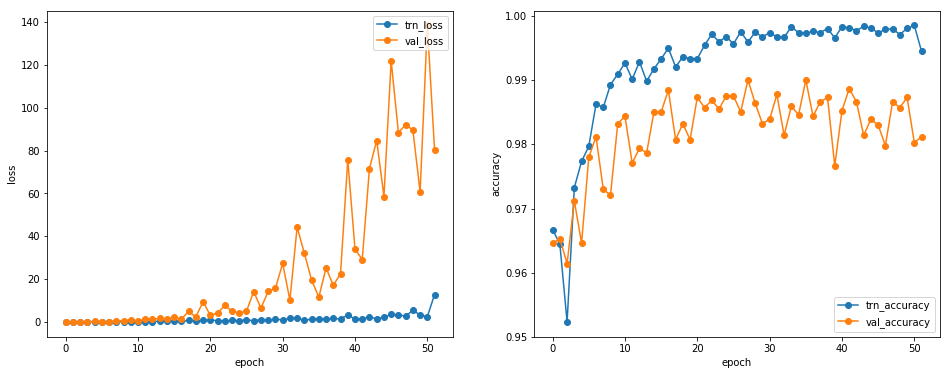

In [38]:
#### Control panel 1, setup model parameters ####
model_name = 'new_cnn_'

max_epoches = 300
batch_size = 64
epochs_print = 5

lr = 1e-3
l2_lambda = 1e-3

resume_training = False
early_stopping_patience = 50

params = [lr, max_epoches, batch_size, l2_lambda, model_name,
          resume_training, early_stopping_patience, epochs_print]

#### train the model and evaluate the mode ###
modern_cnn_modeling(scaled_X_trn_pp, y_trn_pp, scaled_X_val_pp, y_val_pp, scaled_X_tst_pp, y_tst_pp, params=params)

As we can see, by using just LeNet-5 models and constrast normalize preprocess technology, we can reach a 99.8% training accuacy and 98.8% validation accuacy.

Then, we can choose a smaller learning rate and fine tuning the model to see whether if we can get a higher accuacy or not.

INFO:tensorflow:Restoring parameters from models/new_cnn_
EPOCH: 0, lr: 0.00001 ...
Training Loss = 0.02555, Training Accuracy = 0.993
Validation Loss = 0.09541, Validation Accuracy = 0.985

EPOCH: 5, lr: 0.00001 ...
Training Loss = 0.00695, Training Accuracy = 0.999
Validation Loss = 0.05434, Validation Accuracy = 0.985

EPOCH: 10, lr: 0.00001 ...
Training Loss = 0.00294, Training Accuracy = 1.000
Validation Loss = 0.05524, Validation Accuracy = 0.985

EPOCH: 15, lr: 0.00001 ...
Training Loss = 0.00185, Training Accuracy = 1.000
Validation Loss = 0.05981, Validation Accuracy = 0.985

EPOCH: 20, lr: 0.00001 ...
Training Loss = 0.00124, Training Accuracy = 1.000
Validation Loss = 0.07818, Validation Accuracy = 0.984

EPOCH: 25, lr: 0.00001 ...
Training Loss = 0.00080, Training Accuracy = 1.000
Validation Loss = 0.06546, Validation Accuracy = 0.986

EPOCH: 30, lr: 0.00001 ...
Training Loss = 0.00049, Training Accuracy = 1.000
Validation Loss = 0.06890, Validation Accuracy = 0.986

EPOCH:

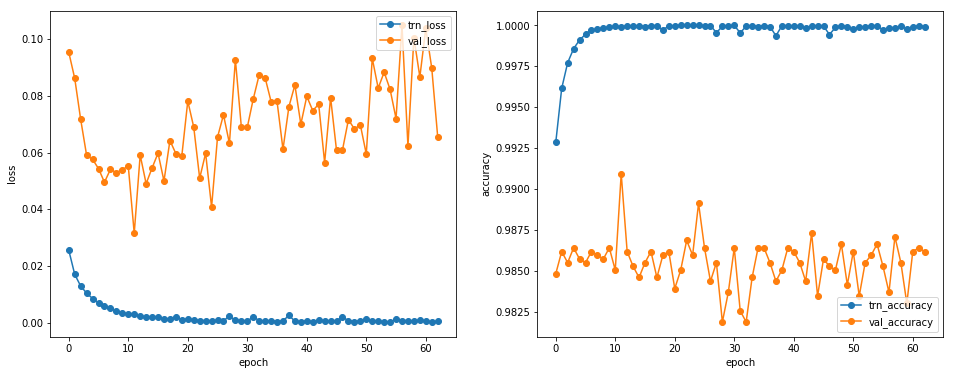

In [39]:
 #### Control panel 2, setup model parameters ####
# Modify learning rate
model_name = 'new_cnn_'

max_epoches = 300
batch_size = 64
epochs_print = 5

lr = 1e-5
l2_lambda = 1e-3

resume_training = True
early_stopping_patience = 50

params = [lr, max_epoches, batch_size, l2_lambda, model_name,
          resume_training, early_stopping_patience, epochs_print]

####  Fine tuning the model ###
modern_cnn_modeling(scaled_X_trn_pp, y_trn_pp, scaled_X_val_pp, y_val_pp, scaled_X_tst_pp, y_tst_pp, params=params)

In [40]:
def evaluate_model(X_data, y_data, model_name, batch_size=64):

    assert len(X_data) == len(y_data)
    n_classes = len(np.unique(y_data))
    # ## construct tensorflow graph ##
    # ----------------
    modern_cnn_graph = tf.Graph()
    with modern_cnn_graph.as_default():
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)

        is_dropout = tf.placeholder(tf.bool)
        logits = get_modern_cnn(x, n_classes=n_classes, dropout=is_dropout)
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # evaluate the model by using test data
    num_examples = len(X_data)
    total_accuracy = 0
    with tf.Session(graph=modern_cnn_graph) as sess:
        saver = tf.train.Saver()
        try:
            saver.restore(sess, 'models/' + model_name)
        except:
            print("Failed restoring previously trained model: file does not exist.")
            pass

        predict_y = np.empty([0], dtype=np.int32)
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset: offset + batch_size], y_data[offset: offset + batch_size]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, is_dropout: False})
            total_accuracy += (accuracy * batch_size)

        accuracy = total_accuracy / num_examples
        print("================= Evaluate ==================")
        print("Model evaluate accuracy = %.4f" % accuracy)

In [41]:
evaluate_model(scaled_X_tst_pp, y_tst_pp, model_name)

INFO:tensorflow:Restoring parameters from models/new_cnn_
================= Evaluate ==================
Model evaluate accuracy = 0.9790


Finally, by using the new cnn model and data augmentation technology, we can reach a 97.9% test dataset accuacy

## Step 3: Test dataset failure analyze

In order to get more infomation about the unrecognized test images. I will do some failure analyze here.   


In [51]:
from sklearn.metrics import confusion_matrix

def failure_analyse(X_data, y_data, model_name, batch_size=64):

    assert len(X_data) == len(y_data)
    n_classes = len(np.unique(y_data))
    # ## construct tensorflow graph ##
    # ----------------
    modern_cnn_graph = tf.Graph()
    with modern_cnn_graph.as_default():
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        y = tf.placeholder(tf.int32, (None))

        is_dropout = tf.placeholder(tf.bool)
        logits = get_modern_cnn(x, n_classes=n_classes, dropout=is_dropout)
        prediction = tf.argmax(logits, 1)

    # evaluate the model by using test data
    num_examples = len(X_data)
    with tf.Session(graph=modern_cnn_graph) as sess:
        saver = tf.train.Saver()
        try:
            saver.restore(sess, 'models/' + model_name)
        except:
            print("Failed restoring previously trained model: file does not exist.")
            pass

        predict_y = np.empty([0], dtype=np.int32)
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset: offset + batch_size], y_data[offset: offset + batch_size]
            pred_batch = sess.run(prediction, feed_dict={x: batch_x, y: batch_y, is_dropout: False})

            predict_y = np.append(predict_y, pred_batch)

    ###  Analyse the incorrect recognize images ####
    incorrect_index = np.nonzero(predict_y != y_data)[0]
    print("Total test samples = %d, unrecognized test samples = %d " % (num_examples, len(incorrect_index)))

    incorrect_classes = [y_data[i] for i in incorrect_index]

    df2 = pd.DataFrame.from_dict(collections.Counter(incorrect_classes), orient='index')
    df2 = df2.rename(columns={'index': 'ClassId', 0: 'Incorrect'})

    sign_names = pd.read_csv('signnames.csv')
    sign_names['Incorrect'] = df2['Incorrect']
    sign_names.fillna(value=0, inplace=True)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    index = np.arange(n_classes)
    sns.barplot(sign_names['SignName'].values, sign_names['Incorrect'].values, alpha=0.8)
    plt.xticks(index, sign_names['SignName'].values, rotation=90)

    plt.title('Incorrect number of Sign Classes', fontsize=12)
    plt.ylabel('Incorrect Classification', fontsize=12)
    plt.subplots_adjust(bottom=0.5)
    plt.show()

    # Using confusion matrix to analyse the incorrect data
    print("The confusion matrix is:")
    print()
    cm = confusion_matrix(y_data, predict_y)
    plot_confusion_matrix(cm, sign_names['ClassId'].values)

    k = 5
    classses, confuse_classes = find_topk_confusion(cm, 5)

    testing_file = path + 'test.p'
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    test_images, test_labels = test['features'], test['labels']
    
    print("The model has bad performace for recongnizing the classes: ")
    
    for i in range(k):
        origin_class_images = test_images[test_labels == classses[i]]
        idx1 = random.sample(range(len(origin_class_images)), 10)
        confuse_class_images = test_images[test_labels == confuse_classes[i]]
        idx2 = random.sample(range(len(confuse_class_images)), 10)

        fig, axes = plt.subplots(2, 10, figsize=(12, 4))
        for j in range(10):
            axes[0, j].imshow(origin_class_images[idx1[j]])
            axes[0, j].grid(False)
            axes[0, j].axis('off')
            axes[1, j].imshow(confuse_class_images[idx2[j]])
            axes[1, j].grid(False)
            axes[1, j].axis('off')
        class_name = sign_names['SignName'].values[classses[i]]
        confuse_class_name = sign_names['SignName'].values[confuse_classes[i]]
        suptitle = class_name + '  vs  ' + confuse_class_name
        # print("%s is easy to confuse with %s" % (class_name, confuse_class_name))
        fig.suptitle(suptitle, fontsize="x-large")
        plt.show()

INFO:tensorflow:Restoring parameters from models/new_cnn_
Total test samples = 12630, unrecognized test samples = 303 


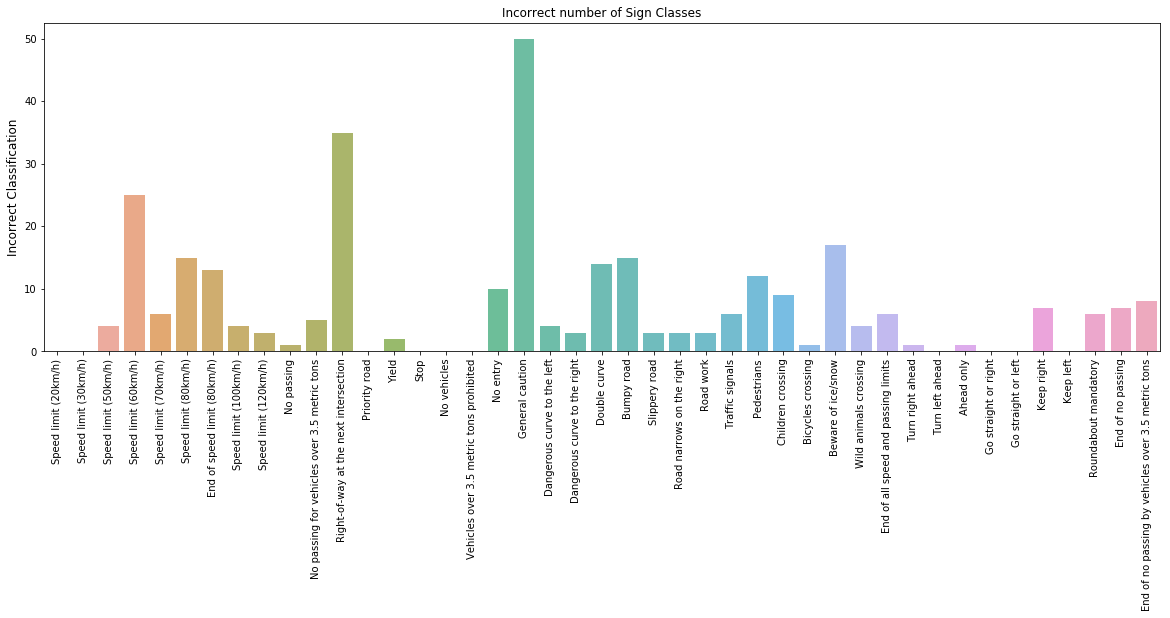

The confusion matrix is:

[[ 60   0   0 ...   0   0   0]
 [  0 720   0 ...   0   0   0]
 [  0   1 746 ...   0   0   0]
 ...
 [  0   0   0 ...  84   0   0]
 [  0   0   0 ...   0  53   0]
 [  0   0   0 ...   0   2  82]]


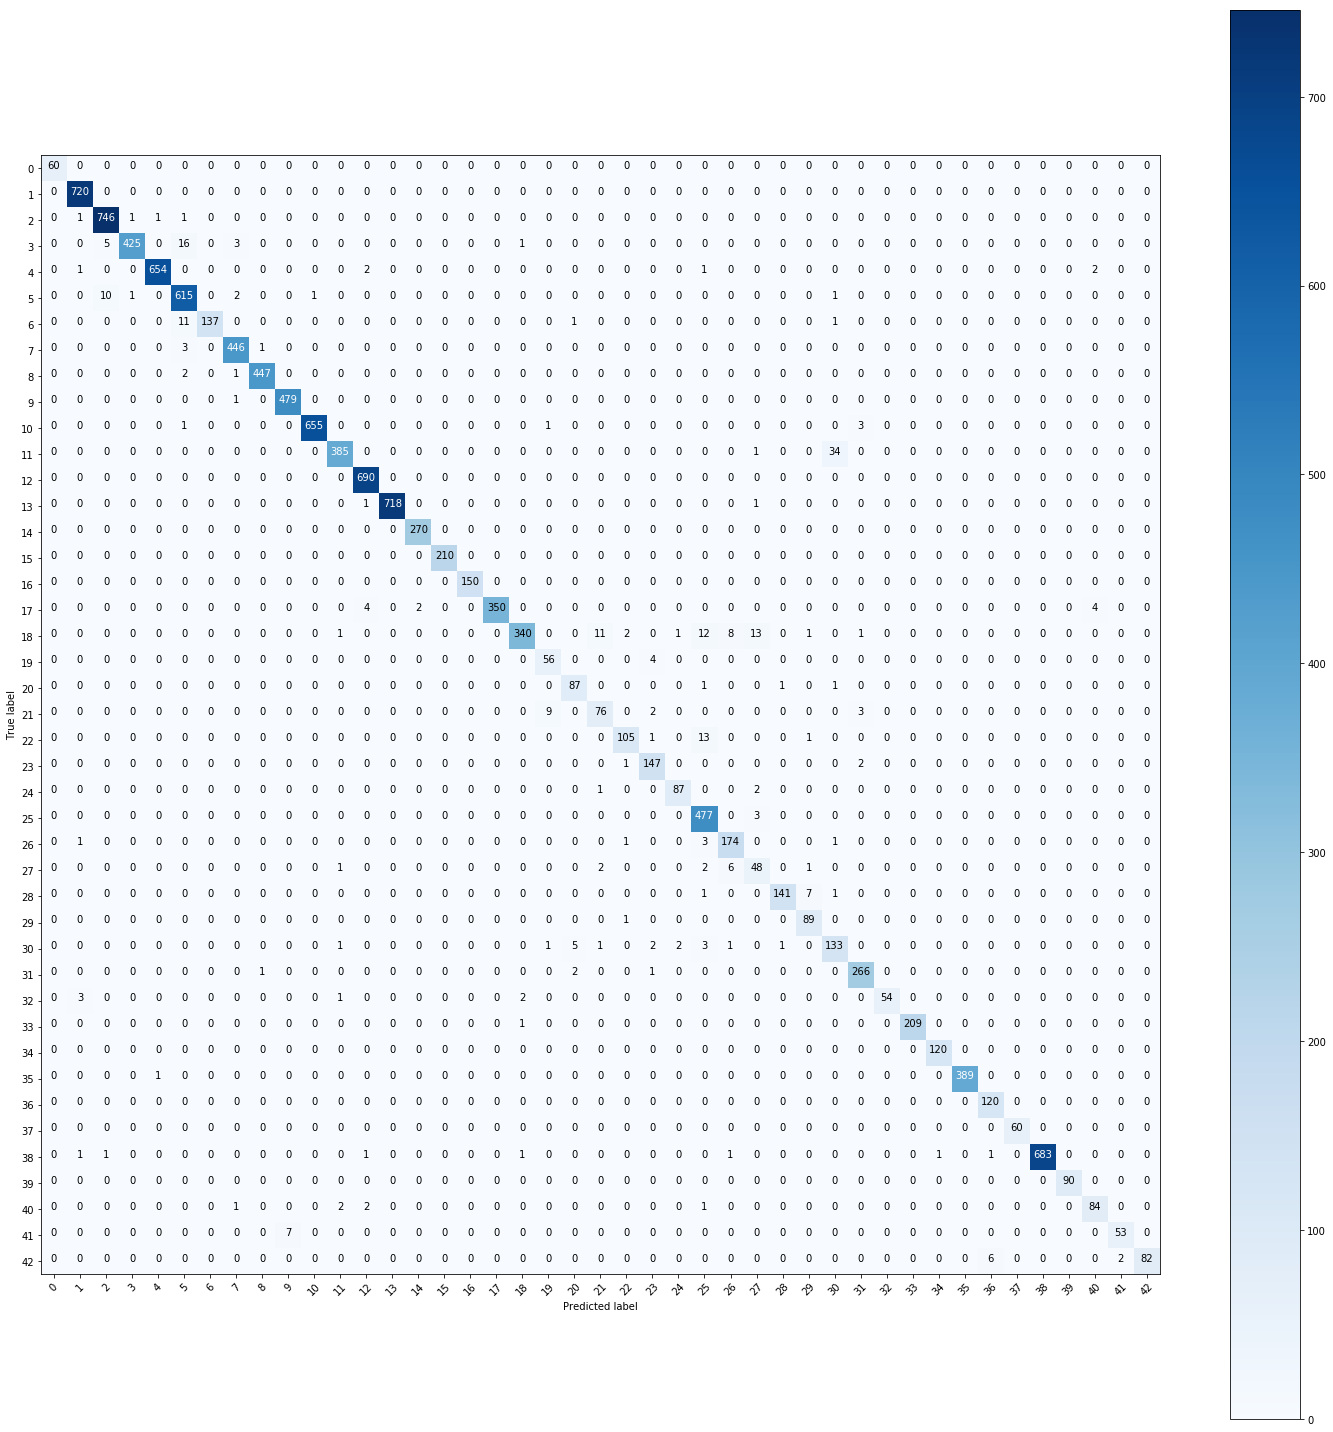

The model has bad performace for recongnizing the classes: 


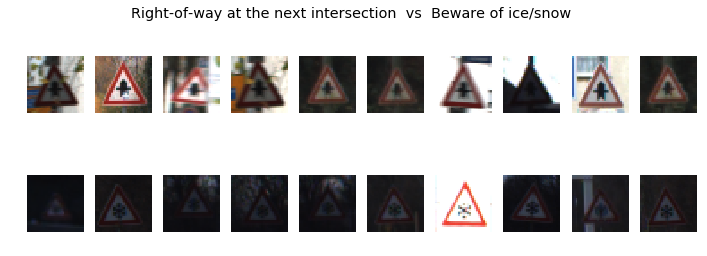

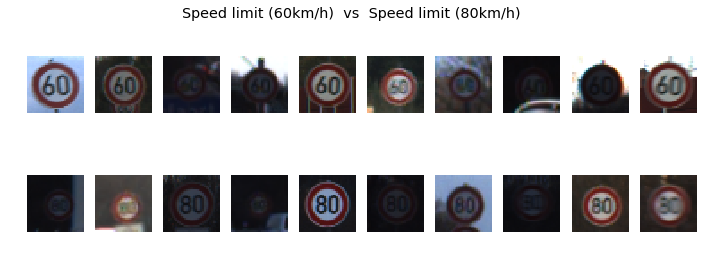

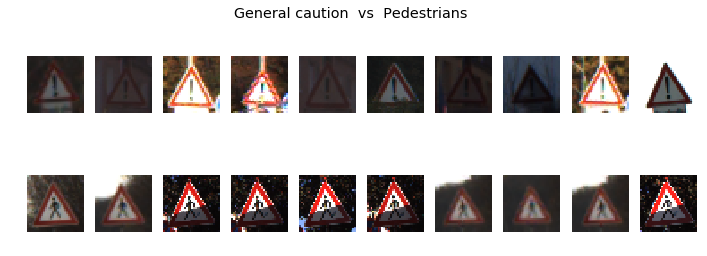

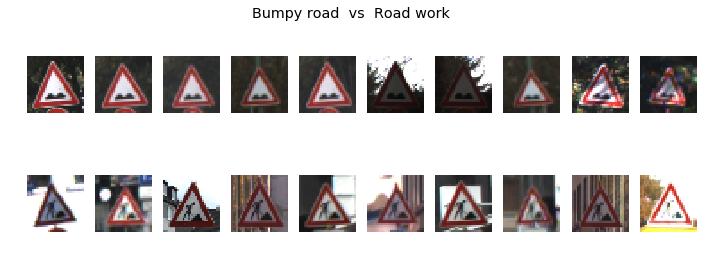

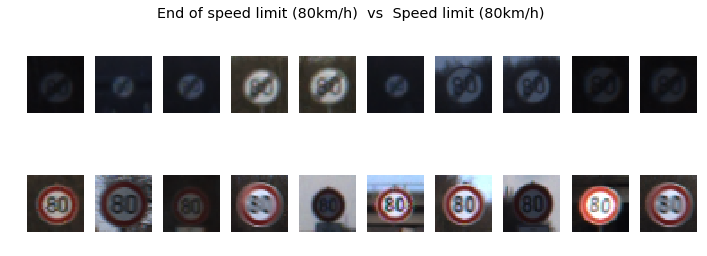

In [52]:
# failure analyse on test dataset
failure_analyse(scaled_X_tst_pp, y_tst_pp, model_name)

It's interesting to see that most mistakes happened with signs that are very similar in form.
This may be one of the reasons why our model still be unable to extract the critical feature to distinguish the two confused classes.

But as we can see, after choosing a more complex model, the model can get a better performance. This leads me to believe that ResNets would also be a very powerfull tool to use in this problem as they allow feature information to flow further down your model as well.

---
## Step 4: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [55]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import cv2
import os
def read_all_imgs(path, color=cv2.IMREAD_COLOR):
    images = []
    labels = []

    filelist = os.listdir(path)

    for file in filelist:

        try:
            img = cv2.imread(path + file, color)
        except:
            img = None

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
            images.append(img)
            label = file.split('.')[0]
            labels.append(int(label))

    return images, labels

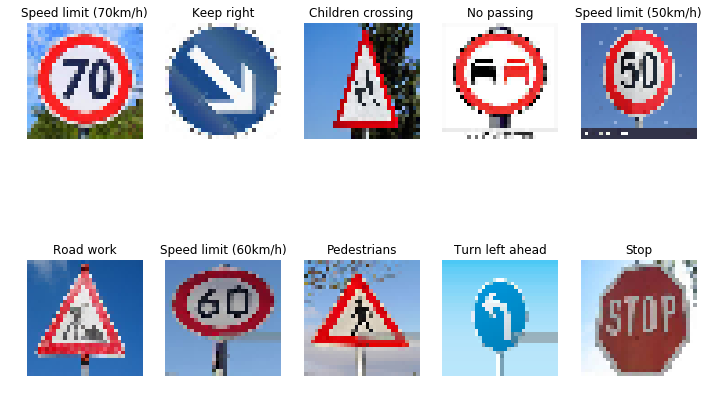

In [60]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
 ###  Find some images from the internet and analyse them

# here, we download ten traffic sign images from the internet    
new_img, new_label = read_all_imgs('input/')
X_new = np.array(new_img)
y_new = np.array(new_label)
sign_names = pd.read_csv('signnames.csv')

implot, axes = plt.subplots(2, 5, figsize=(12, 8))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(X_new[i])
    axes[row, col].grid(False)
    axes[row, col].axis('off')
    axes[row, col].set_title(sign_names.SignName[new_label[i]])
plt.show()

### Predict the Sign Type for Each Image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

INFO:tensorflow:Restoring parameters from models/new_cnn_


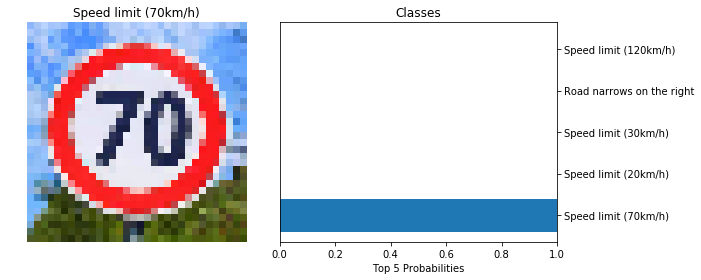

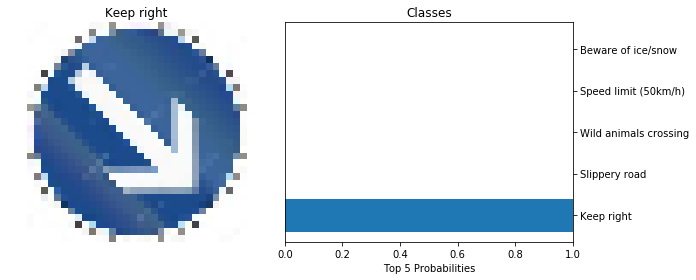

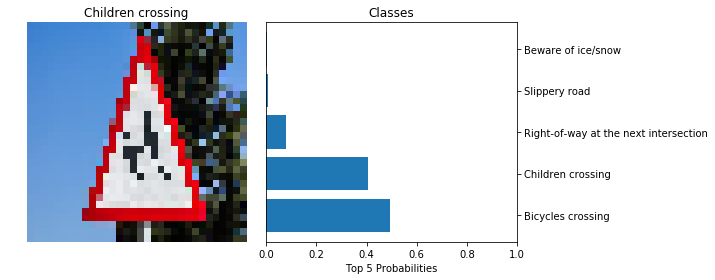

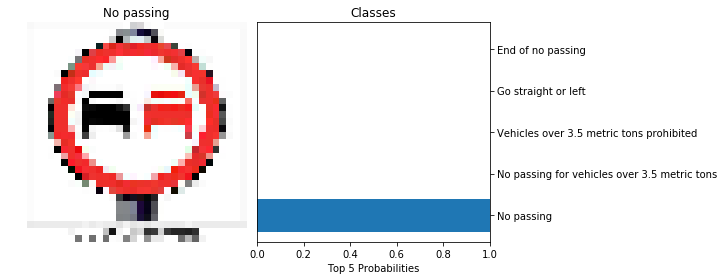

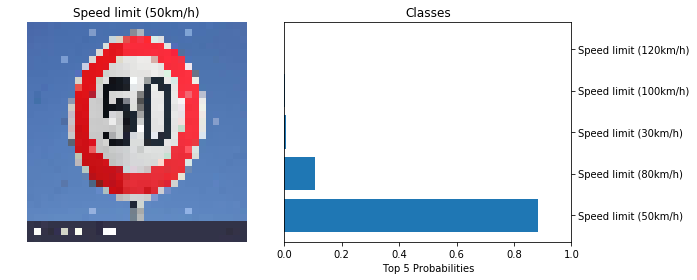

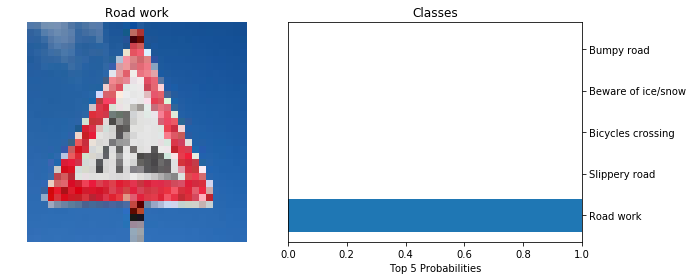

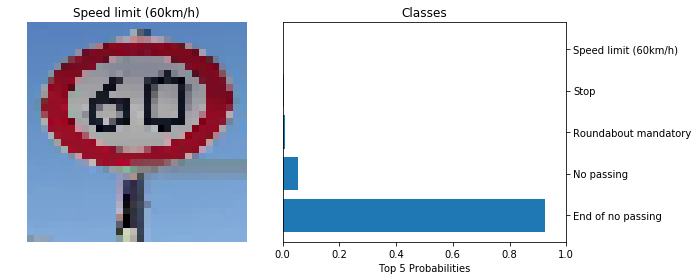

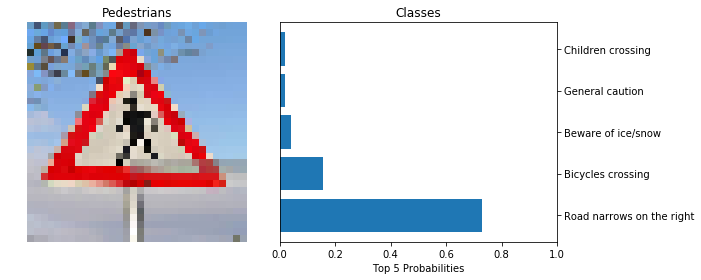

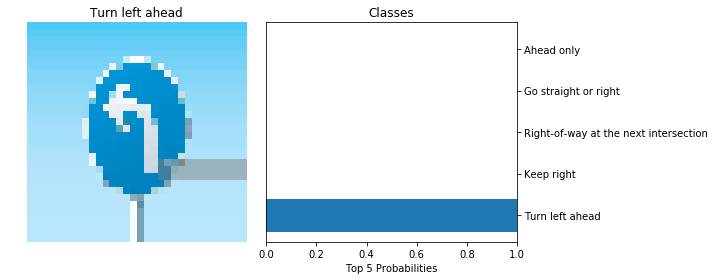

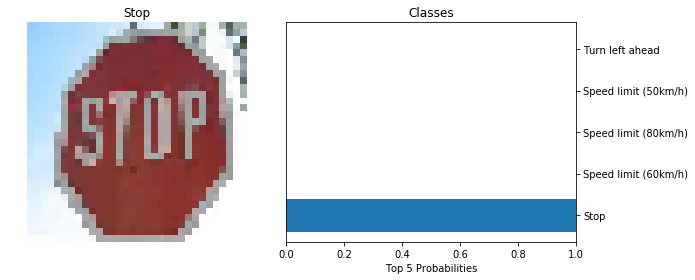

The accuracy of Internet Image = 0.7000)


In [62]:
# preprocess the new test data
X_new_pp = preprocess_array(X_new)

# normalize the new test data
scaled_X_new = (X_new_pp - mean) / stdd

model_name = 'new_cnn_'

#  build graph
modern_cnn_graph = tf.Graph()
with modern_cnn_graph.as_default():
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)

    is_dropout = tf.placeholder(tf.bool)
    logits = get_modern_cnn(x, n_classes=n_classes, dropout=is_dropout)
    logit_probs = tf.nn.softmax(logits)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# ##  evaluate models on the internet images## #
with tf.Session(graph=modern_cnn_graph) as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, 'models/' + model_name)
    accuacy, logits_probs = sess.run([accuracy_operation, logit_probs],
                                     feed_dict={x: scaled_X_new, y: y_new, is_dropout: False})

    top5 = sess.run(tf.nn.top_k(tf.constant(logits_probs), k=5))

    for i in range(10):
        top5_classes = np.array(sign_names.SignName[top5[1][i, :]])
        top5_probs = np.array(top5[0][i, :])

        implot = plt.figure(figsize=(10, 4))

        ax = implot.add_subplot(1, 2, 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_new[i])
        ax.set_title(sign_names.SignName[y_new[i]])

        y_pos = np.arange(len(top5_classes))

        ax2 = implot.add_subplot(1, 2, 2)
        ax2.barh(y_pos, top5_probs, align='center')
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(top5_classes)
        ax2.yaxis.set_ticks_position('right')
        ax2.set_xlabel('Top 5 Probabilities')
        ax2.set_title('Classes')
        ax2.set_xlim([0, 1])

        plt.tight_layout()

        plt.show()

    print("=============================================")
    print("The accuracy of Internet Image = %.4f)" % accuacy)

Accuracy: 70% - As expected we didn't do too well on this limited sample. But that's fine, they were chosen to be difficult for the model to classify. The idea of this sample was to give us more information about where are are getting things wrong.

There maybe some reason for those results:
- Some traffic sign images have some backgrounds which can be thought as noise.
- Some traffic sign images has its shape, before we put it into the model, we have to resize the image size to fit the model. In the resize process, the important features for model to recognize loss.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [67]:
def outputFeatureMap(image_input, activation_min=-1, activation_max=-1, plt_num=1):

    """
    image_input: the test image being fed into the network to produce the feature maps
    tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
    activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
    plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
    """

    modern_cnn_graph = tf.Graph()
    with modern_cnn_graph.as_default():
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        is_dropout = tf.placeholder(tf.bool)
        logits = get_modern_cnn(x, n_classes=n_classes, dropout=is_dropout)

        with tf.variable_scope('conv1', reuse=True):
            conv1_weights = tf.get_variable('weights')

    with tf.Session(graph=modern_cnn_graph) as sess:
        sess.run(tf.global_variables_initializer())

        tf.train.Saver().restore(sess, 'models/' + model_name)
        # If we chose to keep training previously trained model, restore session.
        print("Restore session...")

        # Here make sure to preprocess your image_input in a way your network expects
        # with size, normalization, ect if needed
        # image_input =
        # Note: x should be the same name as your network's tensorflow data placeholder variable
        # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
        # activation = conv1_weights.eval(session=sess, feed_dict={x: image_input, is_dropout: False})
        activation = sess.run(conv1_weights, feed_dict={x: image_input, is_dropout: False})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(20, 12))
        for featuremap in range(featuremaps):
            plt.subplot(4, 8, featuremap + 1)  # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap))  # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0, :, :, featuremap], interpolation="nearest", vmin=activation_min,
                           vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0, :, :, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min != -1:
                plt.imshow(activation[0, :, :, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[:, :, 0, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from models/new_cnn_
Restore session...


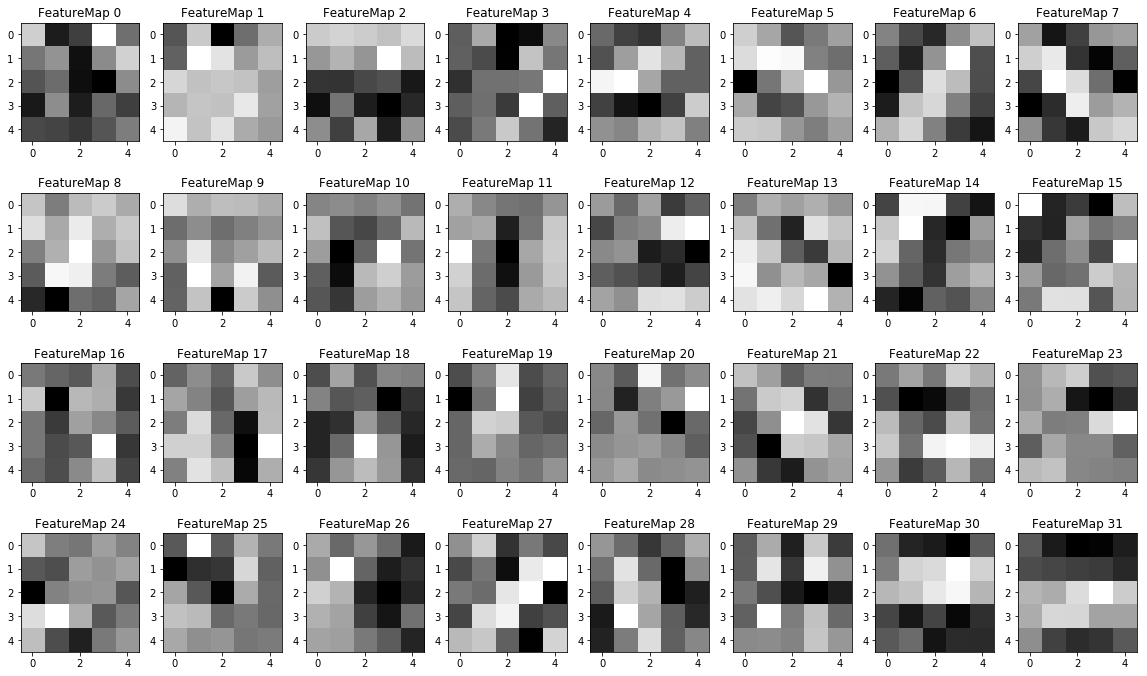

In [68]:
    #### Output feature map ###
outputFeatureMap(scaled_X_tst_pp)

### Acknowledge


[1] [Multi-Column Deep Neural Network for Traffic Sign
Classification](http://people.idsia.ch/~juergen/nn2012traffic.pdf)

[2] [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

[3] Udacity

[4] https://github.com/bguisard/CarND-Traffic-Sign-Classifier-Project